In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [131]:
df_use = pd.read_csv('../../SharedData/dataset-generation/energy_use.csv')
df_prod = pd.read_csv('../../SharedData/dataset-generation/energy_production.csv')

d = {'state':[], 'date':[], 'yearly_energy_prod':[], 'yearly_energy_use':[]}
energy_df = pd.DataFrame(data=d)

In [132]:
abbreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

df_use = df_use[df_use['State'].isin(abbreviations)]
df_prod = df_prod[df_prod['State'].isin(abbreviations)]

In [133]:
years = []
for i in range(0,31):
    years.append(str(1990+i))

In [134]:
df_prod.iloc[0:50,1]
df_prod.shape

(50, 64)

In [135]:
idx = 0
for state_ind in range(df_prod.shape[0]):
    for year_ind in range(1, df_prod.shape[1]):
        energy_df.loc[idx] = [df_prod.iloc[state_ind, 0], 
                              df_prod.columns[year_ind], 
                              df_prod.iloc[state_ind,year_ind], 
                              df_use.iloc[state_ind,year_ind]]
        idx+=1
energy_df

,state,date,yearly_energy_prod,yearly_energy_use
0,AK,1960,"19,424","59,303"
1,AK,1961,"53,991","70,020"
2,AK,1962,"80,577","76,642"
3,AK,1963,"85,632","78,488"
4,AK,1964,"87,924","82,793"
...,...,...,...,...
3145,WY,2018,"7,685,704","544,649"
3146,WY,2019,"7,131,308","532,950"
3147,WY,2020,"5,751,229","484,585"
3148,WY,2021,"5,980,328","482,441"


In [136]:
# clean up data by removing commas and converting to int
energy_df['yearly_energy_use'] = energy_df['yearly_energy_use'].str.replace(',', '').astype(int)
energy_df['yearly_energy_prod'] = energy_df['yearly_energy_prod'].str.replace(',', '').astype(int)
energy_df['date'] = energy_df['date'].astype(int)
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               3150 non-null   object
 1   date                3150 non-null   int64 
 2   yearly_energy_prod  3150 non-null   int64 
 3   yearly_energy_use   3150 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 123.0+ KB


In [137]:
energy_df = energy_df[(energy_df.date>=1990)&(energy_df.date<=2020)]
energy_df

,state,date,yearly_energy_prod,yearly_energy_use
30,AK,1990,4225431,577270
31,AK,1991,4341927,596366
32,AK,1992,4187752,620875
33,AK,1993,3883727,614626
34,AK,1994,3960960,613753
...,...,...,...,...
3143,WY,2016,7487164,491418
3144,WY,2017,7762813,520703
3145,WY,2018,7685704,544649
3146,WY,2019,7131308,532950


In [142]:
11//5

2

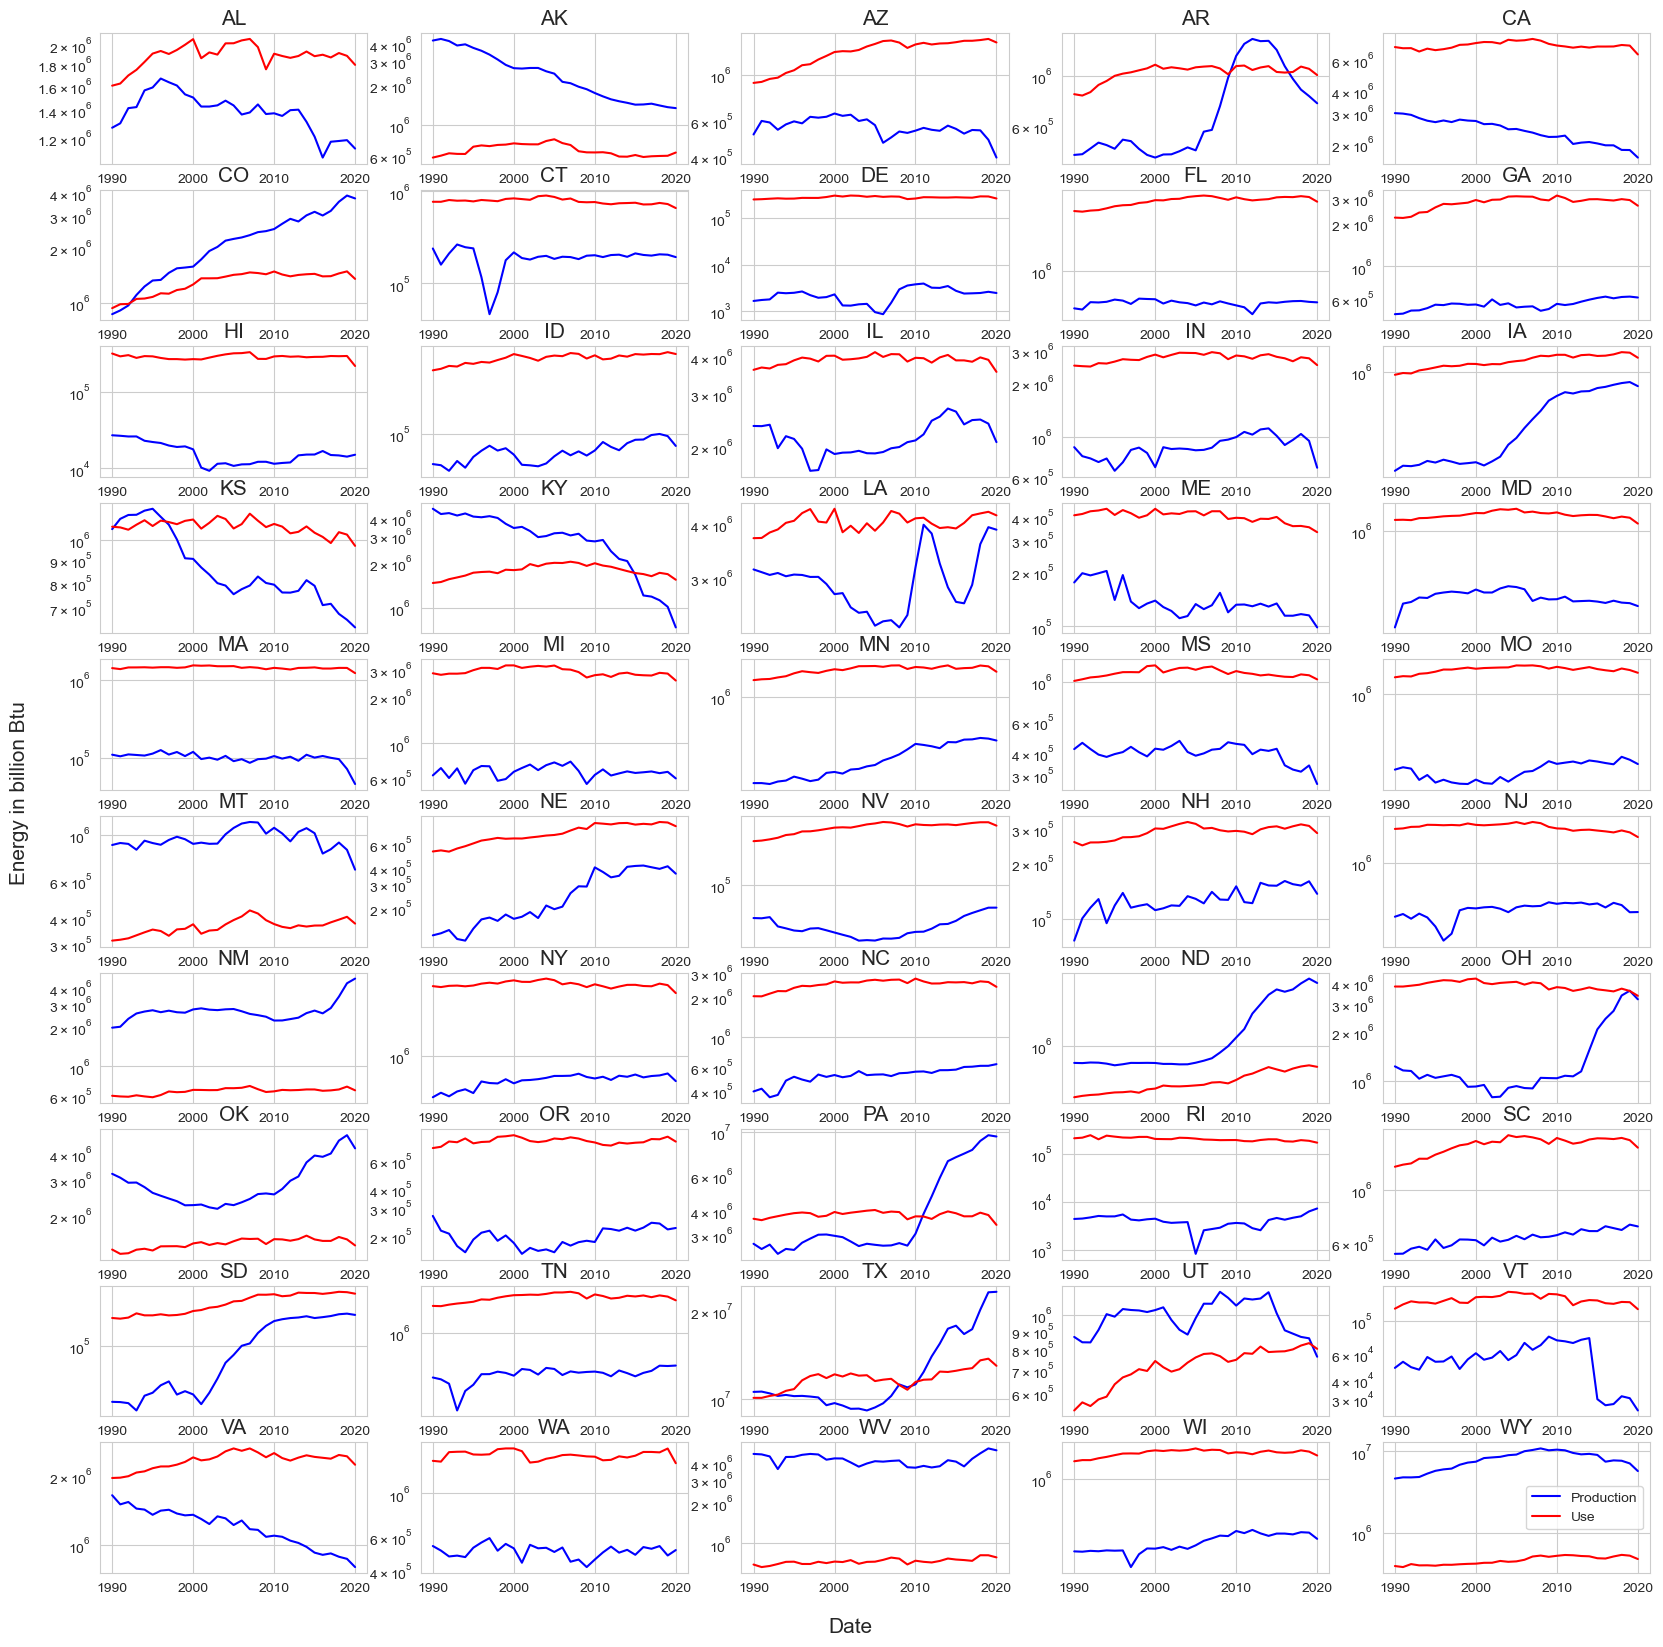

In [146]:
fig, ax = plt.subplots(10,5, figsize=(20,20))

for i,state in enumerate(abbreviations):
    ax[i//5,i%5].plot(energy_df.date[energy_df.state==state], energy_df.yearly_energy_prod[energy_df.state==state], 'b', label='Production')
    ax[i//5,i%5].plot(energy_df.date[energy_df.state==state], energy_df.yearly_energy_use[energy_df.state==state], 'r', label='Use')
    ax[i//5,i%5].set_yscale('log')
    ax[i//5,i%5].set_title(state, fontsize=15)

fig.text(0.5, 0.08, 'Date', ha='center', fontsize=15)
fig.text(0.08, 0.5, 'Energy in billion Btu', va='center', rotation='vertical', fontsize=15)
plt.legend()
plt.show()

In [148]:
energy_df['yearly_energy_flow'] = energy_df['yearly_energy_prod']-energy_df['yearly_energy_use']

C:\Users\lmwhe\AppData\Local\Temp\ipykernel_10500\3150828535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['yearly_energy_flow'] = energy_df['yearly_energy_prod']-energy_df['yearly_energy_use']


C:\Users\lmwhe\AppData\Local\Temp\ipykernel_10500\697195342.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


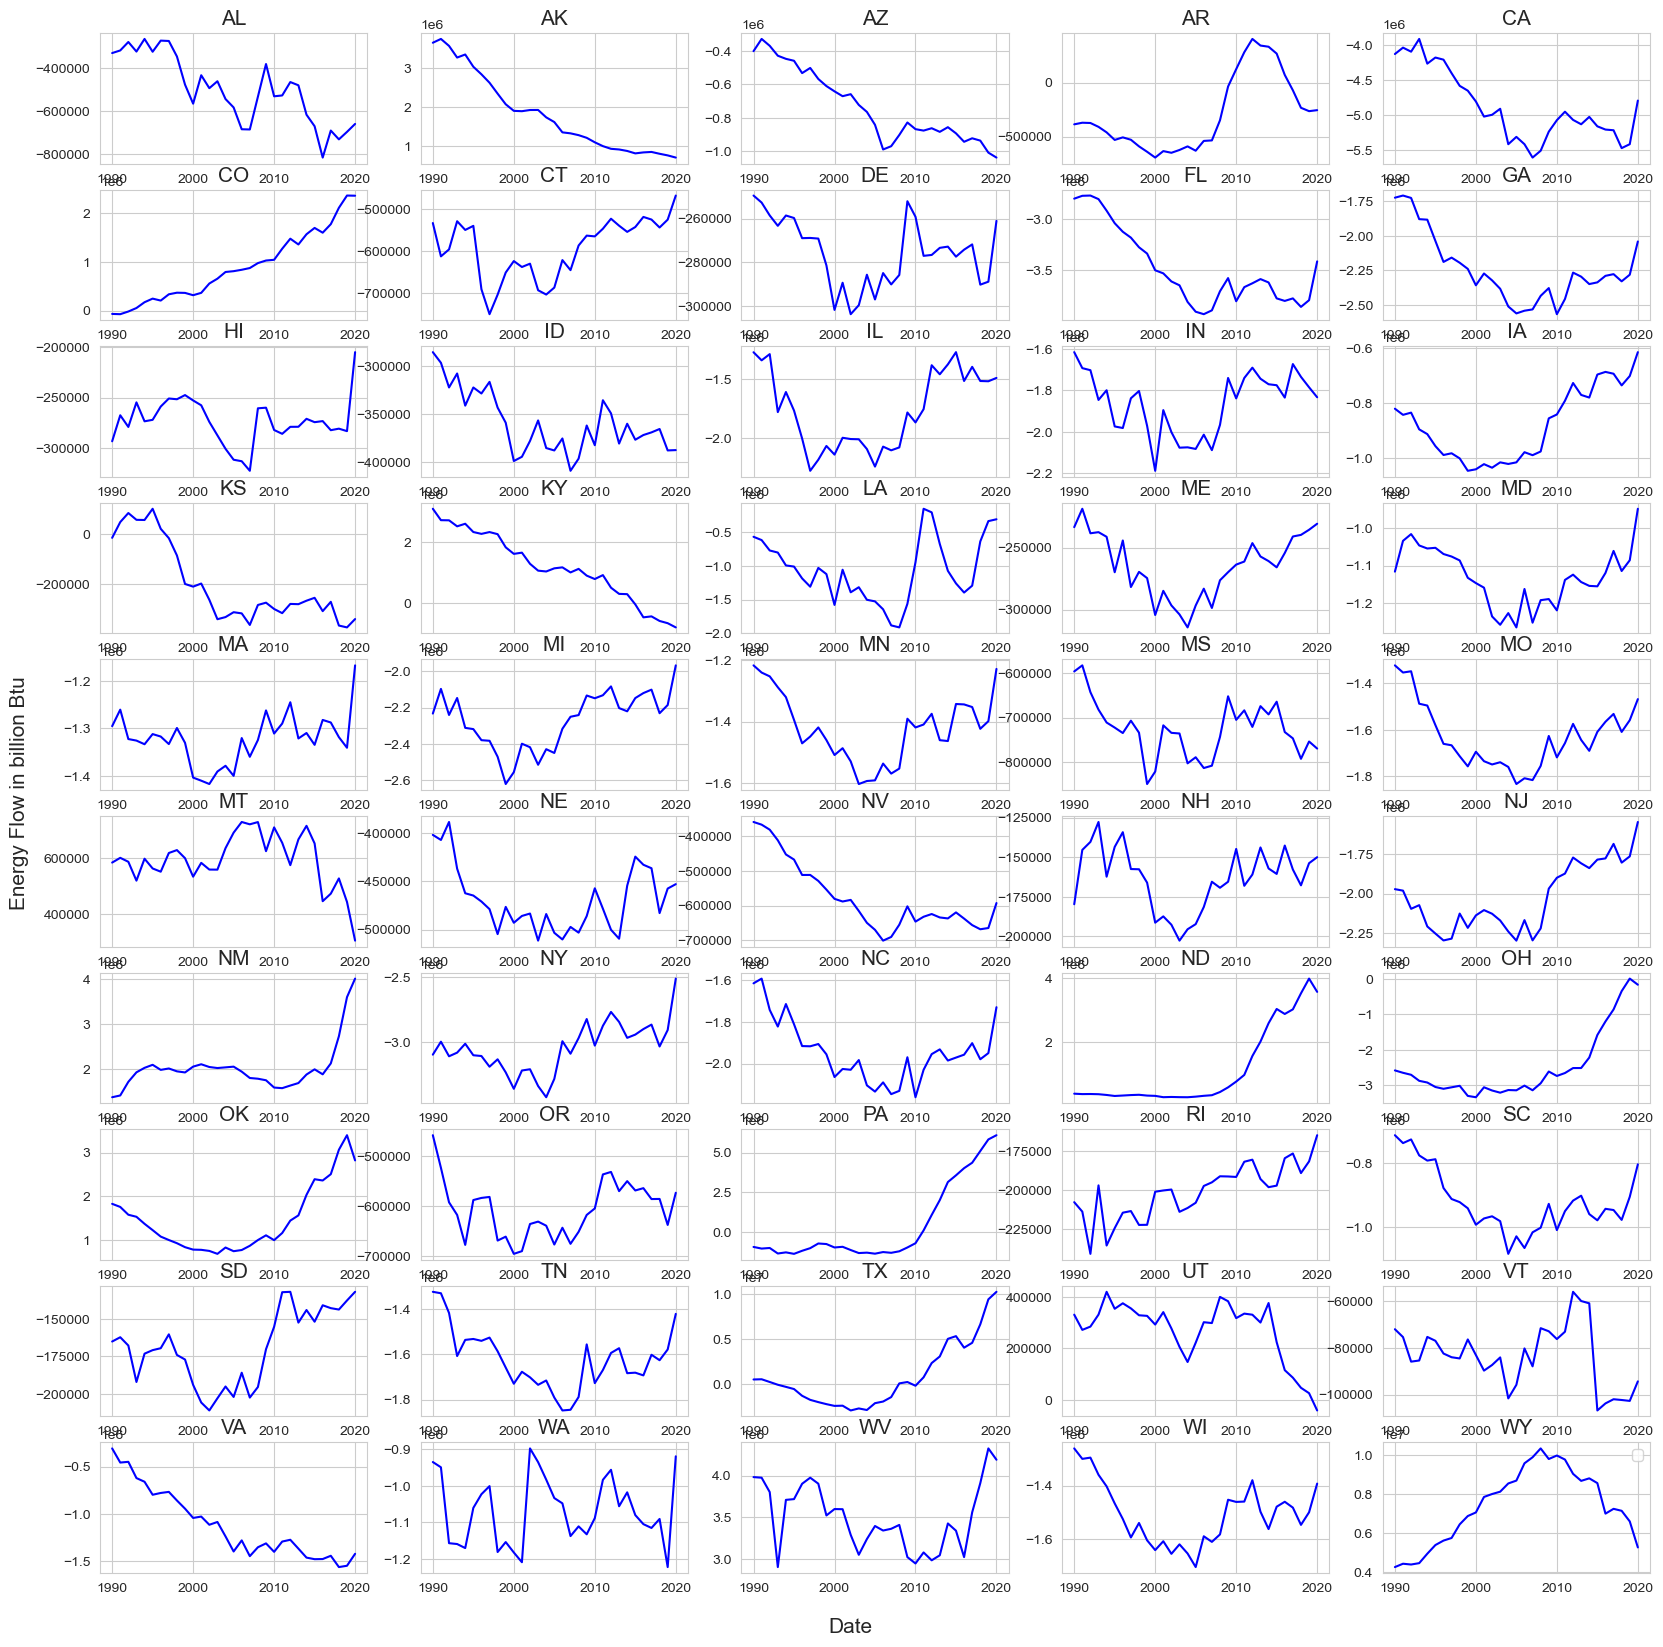

In [149]:
fig, ax = plt.subplots(10,5, figsize=(20,20))

for i,state in enumerate(abbreviations):
    ax[i//5,i%5].plot(energy_df.date[energy_df.state==state], energy_df.yearly_energy_flow[energy_df.state==state], 'b')
    # ax[i//5,i%5].set_yscale('log')
    ax[i//5,i%5].set_title(state, fontsize=15)

fig.text(0.5, 0.08, 'Date', ha='center', fontsize=15)
fig.text(0.08, 0.5, 'Energy Flow in billion Btu', va='center', rotation='vertical', fontsize=15)
plt.legend()
plt.show()